In [2]:
import utilities
import numpy as np
import statistics
from scipy.stats import truncnorm
from scipy.optimize import linear_sum_assignment
import random
import itertools
import matplotlib.pyplot as plt

In [3]:
import Shop
import Environment

In [16]:
shop = Shop.Shop()
env = Environment.Environment(shop.prices1, shop.prices2, shop.discounts)

shop.set_conv_rate(env.true_conv1, env.true_conv2)
shop.best_promo_per_class()

T = 3
total_revenue = []
total_clairvoyant = []
customers_ = []

k = 2 #2 hours per customer?
for t in range(T):
    #env.generate_next_day_customers()
    
    #now we have to simulate the arrival of a customer 
    #we assume to know the class of the customer as soon as he arrives in the shop
    for i in range(k):
        #shop.set_expected_customers(env.customers)
    
        revenue = []
        clairvoyant = []
        #print(env.arrival_of_a_single_customer())
        customers_.append([env.arrival_of_a_single_customer()[0],1])
     
        for cust in customers_:
            cust[1] = cust[1]+1
            
            partial_revenue = 0
            has_bought1 = env.round1(cust[0], shop.best_price[0])
            partial_revenue = has_bought1*shop.best_price[0]

            if has_bought1 == 1:
                has_bought2 = env.round2(cust[0], shop.matched_promos[cust[0]], shop.best_price[1])
                partial_revenue += has_bought2*shop.best_price[1]
            if (cust[1] == 2):
                print(cust[1])
                revenue.append(partial_revenue)
               
            expected_revenue = shop.best_price[0]*env.true_conv1[cust[0], utilities.index(env.prices1, shop.best_price[0])] + env.true_conv1[cust[0], utilities.index(env.prices1, shop.best_price[0])]*env.true_conv2[cust[0], shop.matched_promos[cust[0]], utilities.index(env.prices1, shop.best_price[0])]*shop.best_price[1]
            clairvoyant.append(expected_revenue) 
            customers_.remove(cust)    
                 
    total_revenue.append([np.mean(revenue)])
    total_clairvoyant.append([np.mean(clairvoyant)])

2
2
2
2
2
2


In [17]:
customers_

[]

Text(0, 0.5, 'Revenue')

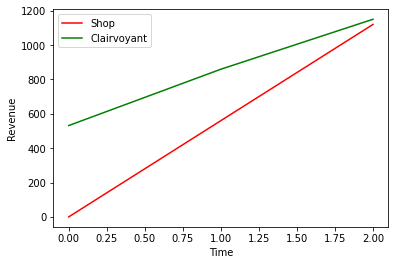

In [18]:
plt.plot(np.cumsum(total_revenue), color='red', label='Shop')
plt.plot(np.cumsum(total_clairvoyant), color='green', label='Clairvoyant')

plt.legend()
plt.xlabel('Time')
plt.ylabel('Revenue')